In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
#评价报告
from sklearn.metrics import classification_report

In [55]:
data = loadmat('/home/teemo/ML/data/ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [56]:
data['X'].shape,data['y'].shape

((5000, 400), (5000, 1))

In [57]:
sample_idx = np.random.choice(np.arange(data['X'].shape[0]),100)
sample_images = data['X'][sample_idx,:]
sample_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

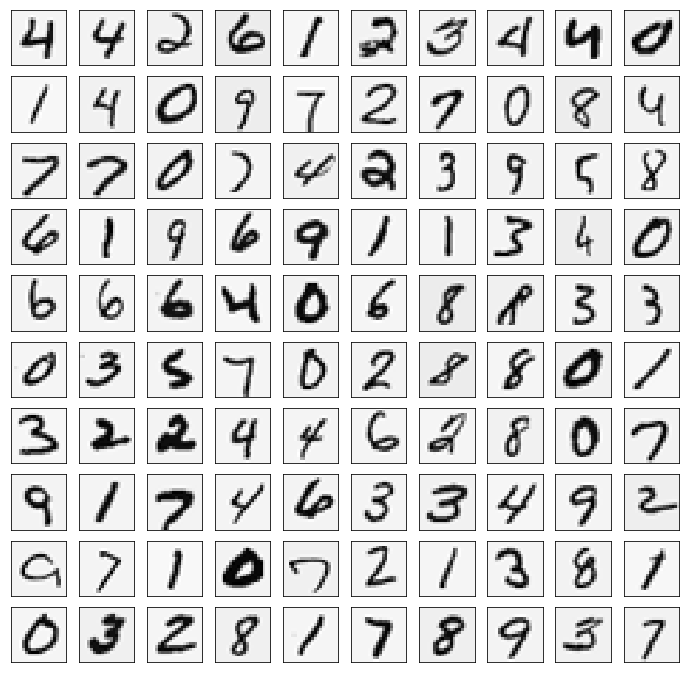

In [58]:
#随机展示其中100个数字
fig,ax_array = plt.subplots(nrows=10,ncols=10,sharex=True,sharey=True,figsize=(12,12))
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10 * r + c].reshape((20, 20))).T,cmap=matplotlib.cm.binary)        
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))


In [59]:
#将逻辑回归向量化，现在有10个数字类别，所以需要训练10个不同的逻辑回归分类器，为了提高效率将逻辑回归向量化

In [60]:
#sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [61]:
#代价函数
def cost(theta,x,y,learningrate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(x*theta.T)))
    reg = (learningrate / (2 * len(x))) * np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first - second)/len(x) + reg 

In [62]:
def gradient(theta,x,y,learningRate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    error = sigmoid(x*theta.T) - y
    
    grad = ((x.T*error)/len(x)).T + ((learningRate/len(x))*theta)
    
    grad[0,0] = np.sum(np.multiply(error,x[:,0])) / len(x)
    
    return np.array(grad).ravel()

In [63]:
#构建分类器
from scipy.optimize import minimize

def one_vs_all(x,y,num_labels,learning_rate):
    rows = x.shape[0]
    params = x.shape[1]
    
    all_theta = np.zeros((num_labels,params+1))
    
    x = np.insert(x,0,values = np.ones(rows),axis = 1)
    
    for i in range(1,num_labels+1):
        theta = np.zeros(params+1)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i,(rows,1))
        
        fmin = minimize(fun=cost,x0=theta,args=(x,y_i,learning_rate),method='TNC',jac=gradient)
        all_theta[i-1,:] = fmin.x
    
    return all_theta

In [64]:
rows = data['X'].shape[0]
params = data['X'].shape[1]

all_theta = np.zeros((10,params+1))

X = np.insert(data['X'],0,values=np.ones(rows),axis=1)

theta = np.zeros(params + 1)
y_0 = np.array([1 if label == 0 else 0 for label in data['y']])
y_0 = np.reshape(y_0,(rows,1))

X.shape,y_0.shape,theta.shape,all_theta.shape

((5000, 401), (5000, 1), (401,), (10, 401))

In [65]:
all_theta = one_vs_all(data['X'],data['y'],10,1)
all_theta.shape

(10, 401)

In [66]:
def predict_all(X,all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]
    X = np.insert(X,0,values=np.ones(rows),axis=1)
    
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    
    h = sigmoid(X * all_theta.T)
    h_argmax = np.argmax(h,axis = 1)
    
    h_argmax = h_argmax + 1
    return h_argmax
    

In [67]:
y_pred = predict_all(data['X'],all_theta)
print(classification_report(data['y'],y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [68]:
#前馈神经网络和预测
weight = loadmat('/home/teemo/ML/data/ex3weights.mat')
theta1 , theta2 = weight['Theta1'],weight['Theta2']
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [69]:
X2 = np.matrix(np.insert(data['X'],0,values=np.ones(X.shape[0]),axis=1))
y2 = np.matrix(data['y'])
X2.shape,y2.shape


((5000, 401), (5000, 1))

In [70]:
a1 = X2
z2 = a1 * theta1.T
z2.shape

(5000, 25)

In [71]:
a2 = sigmoid(z2)
a2.shape

(5000, 25)

In [72]:

a2 = np.insert(a2,0,values=np.ones(a2.shape[0]),axis=1)
z3 = a2 * theta2.T
z3.shape

(5000, 10)

In [73]:
a3 = sigmoid(z3)
a3

matrix([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
         4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
        [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
         2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
        [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
         6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
        ...,
        [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
         2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
        [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
         1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
        [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
         5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

In [74]:
y_pred2 = np.argmax(a3,axis=1) + 1
y_pred2.shape

(5000, 1)

In [75]:
print(classification_report(y2,y_pred2))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

